Manipulação de dados

In [1]:
import pandas as pd
import numpy as np

Visualização de dados

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Machine Learning

In [3]:
from sklearn import metrics

Ocultando Avisos

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
dados=load_breast_cancer()

In [7]:
print(dados.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Transformando a base de dados em um DataFrame

In [8]:
cancer=pd.DataFrame(data=dados.data, columns=dados.feature_names)

In [9]:
cancer["Class"]=dados.target

In [10]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
cancer.shape

(569, 31)

Distribuição das classes
1 - Benigno
0 - Máligno

In [12]:
cancer["Class"].value_counts()

Class
1    357
0    212
Name: count, dtype: int64

Criando um Gráfico de Pizza

In [13]:
colors=["#35B2DE", "#FFCB5A"]

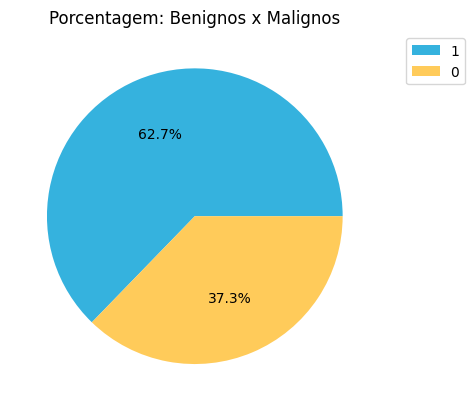

In [14]:
labels = cancer["Class"].value_counts().index
plt.pie(cancer["Class"].value_counts(), autopct="%1.1f%%", colors=colors)
plt.legend(labels, bbox_to_anchor=(1.25, 1))  # Nossas Legendas
plt.title("Porcentagem: Benignos x Malignos")
plt.show()

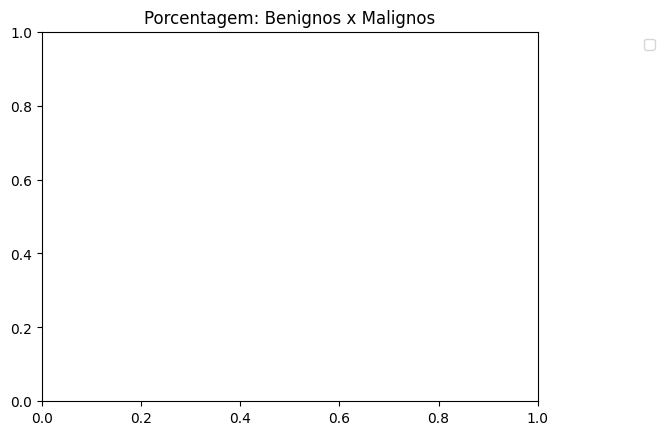

In [15]:
plt.legend(labels, bbox_to_anchor=(1.25, 1))
plt.title("Porcentagem: Benignos x Malignos")
plt.show()

In [16]:
cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Class                      0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = cancer.iloc[:, :-1]  # Seleciona todas as colunas, exceto a última

In [19]:
Y = cancer.iloc[:, -1]  # Seleciona a última coluna

Dividindo os dados em conjuntos de treino e teste

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [21]:
print("X treino:", x_train.shape)
print("X teste:", x_test.shape)
print("Y treino:", y_train.shape)
print("Y teste:", y_test.shape)

X treino: (398, 30)
X teste: (171, 30)
Y treino: (398,)
Y teste: (171,)


In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()  # Criando o modelo
logreg.fit(x_train, y_train)   # Treinando o modelo
y_pred = logreg.predict(x_test) # Predizendo
acc_logreg = round(metrics.accuracy_score(y_test, y_pred) * 100, 1)  # Avaliando a acurácia

print("{}% de acurácia".format(acc_logreg))

97.1% de acurácia


In [24]:
from sklearn.svm import SVC

# Importando nosso modelo
svc = SVC()  # Criando o modelo
svc.fit(x_train, y_train)  # Treinando o modelo
y_pred = svc.predict(x_test)  # Predizendo
acc_svc = round(metrics.accuracy_score(y_test, y_pred) * 100, 1)  # Avaliando a acurácia

print("{}% de acurácia".format(acc_svc))

93.6% de acurácia


In [25]:
from sklearn.naive_bayes import GaussianNB

# Importando nosso modelo
gaussian = GaussianNB()  # Criando o modelo
gaussian.fit(x_train, y_train)  # Treinando o modelo
y_pred = gaussian.predict(x_test)  # Predizendo
acc_gaussian = round(metrics.accuracy_score(y_test, y_pred) * 100, 1)  # Avaliando a acurácia

print("{}% de acurácia".format(acc_gaussian))

94.2% de acurácia


In [26]:
from sklearn.tree import DecisionTreeClassifier

# Importando nosso modelo
tree = DecisionTreeClassifier()  # Criando o modelo
tree.fit(x_train, y_train)  # Treinando o modelo
y_pred = tree.predict(x_test)  # Predizendo
acc_tree = round(metrics.accuracy_score(y_test, y_pred) * 100, 1)  # Avaliando a acurácia

print("{}% de acurácia".format(acc_tree))

93.6% de acurácia


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Importando nosso modelo
forest = RandomForestClassifier(n_estimators=100)  # Criando o modelo
forest.fit(x_train, y_train)  # Treinando o modelo
y_pred = forest.predict(x_test)  # Predizendo
acc_forest = round(metrics.accuracy_score(y_test, y_pred) * 100, 1)  # Avaliando a acurácia

print("{}% de acurácia".format(acc_forest))

96.5% de acurácia


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Importando nosso modelo
knn = KNeighborsClassifier(n_neighbors=1)  # Criando o nosso classificador
knn.fit(x_train, y_train)  # Treinando o modelo
y_pred = knn.predict(x_test)  # Predizendo nossos dados de teste
acc_knn = round(metrics.accuracy_score(y_test, y_pred) * 100, 1)  # Avaliando a acurácia

print("{}% de acurácia".format(acc_knn))  # Exibindo resultado

93.6% de acurácia


In [29]:
import pandas as pd

modelos = pd.DataFrame({
    "Modelos": [
        "Regressão Logística", 
        "Support Vector Machine", 
        "Gaussian Naive Bayes", 
        "Árvore de Decisão", 
        "Random Forest", 
        "KNN"
    ],
    "Score": [
        acc_logreg, 
        acc_svc, 
        acc_gaussian, 
        acc_tree, 
        acc_forest, 
        acc_knn
    ]
})

modelos.sort_values(by="Score", ascending=False)

,Modelos,Score
0,Regressão Logística,97.1
4,Random Forest,96.5
2,Gaussian Naive Bayes,94.2
1,Support Vector Machine,93.6
3,Árvore de Decisão,93.6
5,KNN,93.6
